In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print "dimension de las imagenes y las clases", X.shape, y.shape

dimension de las imagenes y las clases (1500, 784) (1500,)


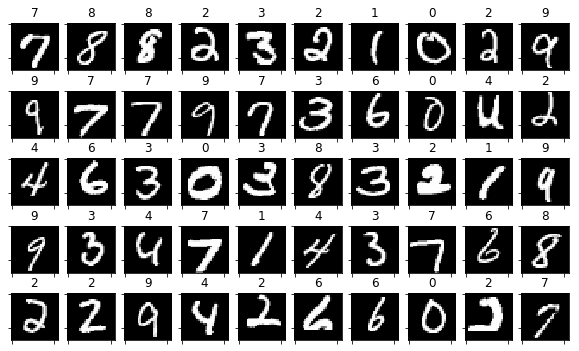

In [3]:
perm = np.random.permutation(range(X.shape[0]))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# A regular neural network for classification

![alt text](./Images/ann1.png)

Number of connections:

    INPUT to LAYER 1:    784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:   50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:   30*20 + 20 (bias) = 620
    LAYER 3 to OUTPUT:    20*10 + 10 (bias) = 210
    
                                         TOTAL 41610

observe we convert `y` to a one_hot encoding

In [4]:
yoh = np.eye(10)[y]

In [5]:
i = np.random.randint(len(y))
y[i], yoh[i]

(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print X_train.shape, y_train_oh.shape

(300, 784) (300, 10)


### create the model

In [7]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [8]:
def get_model_A(input_dim, s1, s2, s3, s3_activation="relu"):
    print input_dim*s1 + s1*s2 + s2*s3 + s3*10 + s1+s2+s3+10
    clear_session()
    model = Sequential()
    model.add(Dense(s1, activation='relu', input_dim=input_dim))
    model.add(Dense(s2, activation='relu'))
    model.add(Dense(s3, activation=s3_activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

In [9]:
model = get_model_A(input_dim=X.shape[1], s1=50, s2=30, s3=20)
model.summary()

41610
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 41,610
Trainable params: 41,610
Non-trainable params: 0
_________________________________________________________________


### fit and display losses

In [10]:
model.fit(X_train, y_train_oh, epochs=200, batch_size=32, validation_data=(X_test, y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/200
300/300 [==============================] - 1s 3ms/step - loss: 2.2484 - val_loss: 2.1841
Epoch 2/200
300/300 [==============================] - 0s 349us/step - loss: 2.0077 - val_loss: 2.0163
Epoch 3/200
300/300 [==============================] - 0s 334us/step - loss: 1.8096 - val_loss: 1.8490
Epoch 4/200
300/300 [==============================] - 0s 324us/step - loss: 1.5836 - val_loss: 1.6708
Epoch 5/200
300/300 [==============================] - 0s 371us/step - loss: 1.3567 - val_loss: 1.4719
Epoch 6/200
300/300 [==============================] - 0s 335us/step - loss: 1.1200 - val_loss: 1.2918
Epoch 7/200
300/300 [==============================] - 0s 360us/step - loss: 0.9084 - val_loss: 1.1234
Epoch 8/200
300/300 [==============================] - 0s 355us/step - loss: 0.7338 - val_loss: 1.0215
Epoch 9/200
300/300 [==============================] - 0s 329us/step - loss: 0.5979 - val_loss: 0.9100
Epoch 10/200
300/300 [======

300/300 [==============================] - 0s 367us/step - loss: 4.0161e-04 - val_loss: 1.0819
Epoch 156/200
300/300 [==============================] - 0s 406us/step - loss: 3.9550e-04 - val_loss: 1.0833
Epoch 157/200
300/300 [==============================] - 0s 354us/step - loss: 3.8893e-04 - val_loss: 1.0831
Epoch 158/200
300/300 [==============================] - 0s 326us/step - loss: 3.8407e-04 - val_loss: 1.0837
Epoch 159/200
300/300 [==============================] - 0s 341us/step - loss: 3.7882e-04 - val_loss: 1.0838
Epoch 160/200
300/300 [==============================] - 0s 323us/step - loss: 3.7283e-04 - val_loss: 1.0870
Epoch 161/200
300/300 [==============================] - 0s 316us/step - loss: 3.6804e-04 - val_loss: 1.0894
Epoch 162/200
300/300 [==============================] - 0s 345us/step - loss: 3.6288e-04 - val_loss: 1.0894
Epoch 163/200
300/300 [==============================] - 0s 313us/step - loss: 3.5696e-04 - val_loss: 1.0904
Epoch 164/200
300/300 [==========

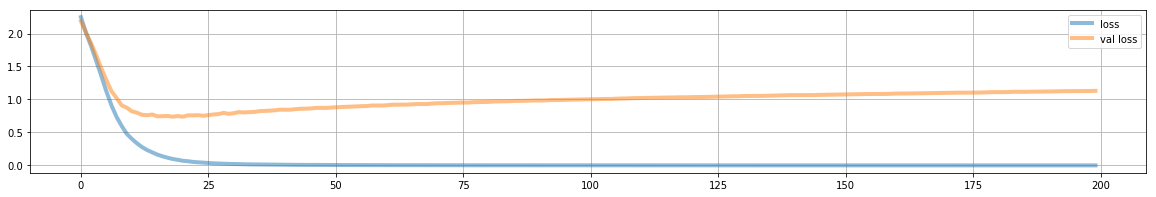

In [11]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

### measure accuracies

- why are we using argmax below?

In [12]:
preds_train = model.predict(X_train).argmax(axis=1)
preds_test = model.predict(X_test).argmax(axis=1)

print "accuracy train %.3f"%(np.mean(preds_train==y_train))
print "accuracy test  %.3f"%(np.mean(preds_test==y_test))

accuracy train 1.000
accuracy test  0.798


# Multimodal network

We will simulate we have information about our data from an additional source. This can be the case when we have, for instance, medical images and associated clinical data. In this situation we have **multimodal data** (images and numeric).

We would like to have an arquitecture in which we can inject both image and numeric data.

In this case, we assume we have an additional information source, telling us with a size 2 vector whether each image contains an odd or even number (with vaues `[1 0]`  or `[0 1]`)

This new info **is injected at LAYER 3** simply concatenating the neurons

![alt text](./Images/ann2.png)

Number of connections:


    INPUT 1 to LAYER 1:              784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:               50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:               30*20 + 20 (bias) = 620
    LAYER 3 + INPUT 2 to OUTPUT:  (20+2)*10 + 10 (bias) = 230
    
                                                    TOTAL 41630

observe how this new architecture is built, and how the two kinds of information are handled both when building the network or when fitting or predicting

In [13]:
def get_model_B(input_dim, extra_info_dim,  s1, s2, s3, s3_activation="relu"):
    clear_session()
    inp1 = Input(shape=(input_dim,))
    l11 = Dense(s1, activation="relu")(inp1)
    l12 = Dense(s2, activation="relu")(l11)
    l13 = Dense(s3, activation=s3_activation)(l12)
    
    inp2 = Input(shape=(extra_info_dim,))
    cc1 = concatenate([l13, inp2],axis=1) # Merge row, same column
    output = Dense(10, activation='softmax')(cc1)
    model = Model(inputs=[inp1, inp2], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

We simulate extra information, we could actually have several choices to encode this information, for instance

- `[ 1, 0] [ 0, 1]` or
- `[ 1,-1] [-1, 1]` or
- `[10, 0] [ 0,10]` among others

Observe how **k0**, **k1** control how the data is represented. Try:
    
- k0=0, k1=1
- k0=-0.5, k1=2
- k0=0, k2=10
- k0=-0.5, k1=20

to understand how this coding affects the representation

In [14]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [15]:
model = get_model_B(input_dim=X.shape[1], extra_info_dim=X_train_extra.shape[1], s1=50, s2=30, s3=20,
                   s3_activation="tanh")
model.summary() 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           39250       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           1530        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           620         dense_1[0][0]                    
__________________________________________________________________________________________________
input_2 (I

In [16]:
model.fit([X_train, X_train_extra], y_train_oh, epochs=200, batch_size=32, 
          validation_data=([X_test, X_test_extra], y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/200
300/300 [==============================] - 1s 3ms/step - loss: 2.3767 - val_loss: 2.2461
Epoch 2/200
300/300 [==============================] - 0s 316us/step - loss: 2.0248 - val_loss: 2.0076
Epoch 3/200
300/300 [==============================] - 0s 321us/step - loss: 1.7547 - val_loss: 1.7727
Epoch 4/200
300/300 [==============================] - 0s 321us/step - loss: 1.5150 - val_loss: 1.5826
Epoch 5/200
300/300 [==============================] - 0s 345us/step - loss: 1.3053 - val_loss: 1.4251
Epoch 6/200
300/300 [==============================] - 0s 316us/step - loss: 1.1271 - val_loss: 1.2867
Epoch 7/200
300/300 [==============================] - 0s 318us/step - loss: 0.9770 - val_loss: 1.1834
Epoch 8/200
300/300 [==============================] - 0s 309us/step - loss: 0.8388 - val_loss: 1.0800
Epoch 9/200
300/300 [==============================] - 0s 347us/step - loss: 0.7212 - val_loss: 0.9926
Epoch 10/200
300/300 [======

300/300 [==============================] - 0s 322us/step - loss: 0.0029 - val_loss: 0.6970
Epoch 158/200
300/300 [==============================] - 0s 385us/step - loss: 0.0029 - val_loss: 0.6975
Epoch 159/200
300/300 [==============================] - 0s 382us/step - loss: 0.0028 - val_loss: 0.6988
Epoch 160/200
300/300 [==============================] - 0s 366us/step - loss: 0.0028 - val_loss: 0.6996
Epoch 161/200
300/300 [==============================] - 0s 399us/step - loss: 0.0028 - val_loss: 0.7001
Epoch 162/200
300/300 [==============================] - 0s 374us/step - loss: 0.0027 - val_loss: 0.7007
Epoch 163/200
300/300 [==============================] - 0s 331us/step - loss: 0.0027 - val_loss: 0.7006
Epoch 164/200
300/300 [==============================] - 0s 345us/step - loss: 0.0027 - val_loss: 0.7026
Epoch 165/200
300/300 [==============================] - 0s 374us/step - loss: 0.0027 - val_loss: 0.7036
Epoch 166/200
300/300 [==============================] - 0s 361us/ste

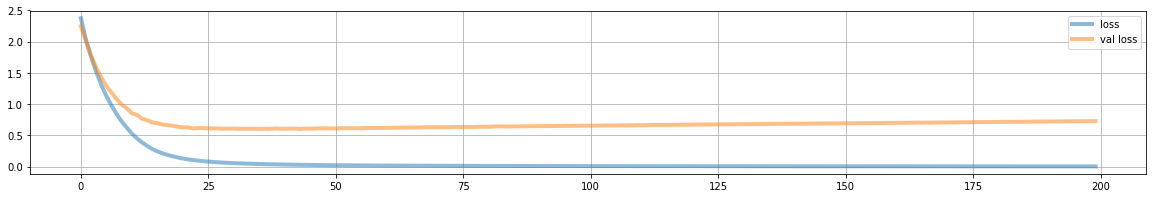

In [17]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [18]:
preds_train = model.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model.predict([X_test, X_test_extra]).argmax(axis=1)

print "accuracy train %.3f"%(np.mean(preds_train==y_train))
print "accuracy test  %.3f"%(np.mean(preds_test==y_test))

accuracy train 1.000
accuracy test  0.821
